Used MNIST dataset to do the following:

Create a Feed Forward Neural Network where

• Input layer has 784 nodes and output layer have appropriate number of node(10)

• Used Multiclass Cross Entropy loss function, Stochastic Gradient
descent(SGD) optimizer and random weight initialization techniques
to train the model.

• Reported all the hyperparameters that you have assumed like batch size,learning rate etc.

• Plotted epoch wise training loss and Reported testing accuracy.

In [ ]:
import numpy as np
import gzip
import sys
import pickle as cPickle
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dropout
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from keras import initializers
from keras import optimizers
from matplotlib import pyplot
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from tensorflow.keras.layers import BatchNormalization
from array import array

#Q2
#unpacking the images
def images_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')

        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

def labels_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

train_images = images_file_read("/content/drive/MyDrive/train-images-idx3-ubyte.gz")
train_labels = labels_file_read("/content/drive/MyDrive/train-labels-idx1-ubyte.gz")
test_imagesall = images_file_read("/content/drive/MyDrive/t10k-images-idx3-ubyte.gz")
test_labelsall = labels_file_read("/content/drive/MyDrive/t10k-labels-idx1-ubyte.gz")


# dividing into validation set and test set
val_images = test_imagesall[0:500,:,:]
val_labels = test_labelsall[0:500]
test_images = test_imagesall[500:,:,:]
test_labels = test_labelsall[500:]

#normalizing images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5
val_images = (val_images / 255) - 0.5

#flatening the images
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))
val_images = val_images.reshape((-1, 784))

In [ ]:
# Model
model = Sequential()
model.add(Dense(784, input_dim=784))  #input layer

#Hidden Layers
model.add(Dense(512, input_dim=784, trainable=True,activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros')) 
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(10, trainable=True, activation='softmax')) # output layer

#optimizer
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 784)               615440    
                                                                 
 dense_82 (Dense)            (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_7 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 512)               0         
                                                                 
 dense_83 (Dense)            (None, 128)               65664     
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Training the model.
history=model.fit(
  train_images,
  to_categorical(train_labels),
  validation_data=(val_images, to_categorical(val_labels)),  
  epochs=15,
  batch_size=512,
  shuffle = True,
  callbacks=[es,mc]
)

Epoch 1/30
117/118 [============================>.] - ETA: 0s - loss: 0.9127 - accuracy: 0.7419
Epoch 1: val_accuracy improved from -inf to 0.91600, saving model to best_model.h5
118/118 [==============================] - 9s 66ms/step - loss: 0.9118 - accuracy: 0.7422 - val_loss: 0.4742 - val_accuracy: 0.9160
Epoch 2/30
117/118 [============================>.] - ETA: 0s - loss: 0.3356 - accuracy: 0.9061
Epoch 2: val_accuracy improved from 0.91600 to 0.93800, saving model to best_model.h5
118/118 [==============================] - 7s 62ms/step - loss: 0.3355 - accuracy: 0.9062 - val_loss: 0.5385 - val_accuracy: 0.9380
Epoch 3/30
117/118 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.9278
Epoch 3: val_accuracy improved from 0.93800 to 0.94400, saving model to best_model.h5
118/118 [==============================] - 7s 62ms/step - loss: 0.2479 - accuracy: 0.9278 - val_loss: 0.4357 - val_accuracy: 0.9440
Epoch 4/30
117/118 [============================>.] - ETA: 0s

297/297 [==============================] - 2s 5ms/step - loss: 0.0787 - accuracy: 0.9771
Classwise Accuracy:
Class  0  : 0.9850746268656716
Class  1  : 0.9943820224719101
Class  2  : 0.9723643807574207
Class  3  : 0.9761658031088083
Class  4  : 0.9697950377562028
Class  5  : 0.9584323040380047
Class  6  : 0.9879781420765027
Class  7  : 0.9765066394279878
Class  8  : 0.9657387580299786
Class  9  : 0.9821989528795811
Overall accuracy: 0.977052628993988


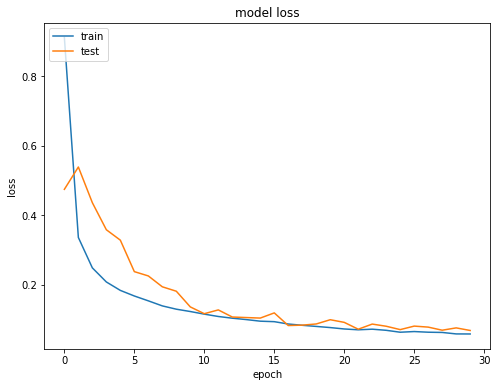

In [ ]:
# Evaluating the model.
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(
  test_images,
  to_categorical(test_labels)
)

from sklearn.metrics import confusion_matrix
pred=model.predict(test_images) 
y_pred=np.argmax(pred,axis=1)

matrix = confusion_matrix(test_labels, y_pred)
cwa=matrix.diagonal()/matrix.sum(axis=1)

print("Classwise Accuracy:")
for i in range(0,10):
  print("Class ",i," :",cwa[i])

print('Overall accuracy:', scores[1])

from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Test Accuracy: > 95%

Hyper-Parameters assumed: 
*  Learning rate: 0.01
*  Momentum: 0.9
*  Epochs: 30
*  Batch Size: 512





